# Madness 2024

## Research

We will be normalizing to the Kaggle data. We will need to render out a team name mapping for all of the 3 datasets. For espn we need to check and make sure there are no duplicate teams. 

Using elo and Kaggle data build base model using last years tournament as the test set. We want to build a way to simulate each round of the tournament based on end of season stats

## Data Sources

- [Kaggle](https://www.kaggle.com/competitions/march-machine-learning-mania-2023)
- [ESPN-API](https://gist.github.com/nntrn/ee26cb2a0716de0947a0a4e9a157bc1c)
- [theedgepredictor/elo-rating](https://github.com/theedgepredictor/elo-rating)
- [BartTorvik](https://barttorvik.com/)

In [ ]:
'''seeds_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}NCAATourneySeeds.csv")
slots_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}NCAATourneySlots.csv")
slots_df = df_rename_fold(slots_df, 'Strong','Weak')
seeds_df = pd.merge(seeds_df, slots_df, on=['Season','Seed'])

seeds_df['seed'] = seeds_df['Seed'].str.slice(start=1, stop=3).astype(int)
seeds_df['division'] = seeds_df['Seed'].str[0]
seeds_df['round'] = 0
seeds_df.loc[seeds_df['Slot'].str.contains('R'),'round'] = seeds_df.loc[seeds_df['Slot'].str.contains('R')]['Slot'].str[1].astype(int)
post_df = pd.merge(post_df, seeds_df[['Season', 'TeamID', 'seed']].rename(columns={'seed': 'WSeed', 'TeamID': 'WTeamID'}), on=["Season", "WTeamID"], how="left")
post_df = pd.merge(post_df, seeds_df[['Season', 'TeamID', 'seed','division','round']].rename(columns={'seed': 'LSeed', 'TeamID': 'LTeamID'}), on=["Season", "LTeamID"], how="left")
del seeds_df'''

In [99]:
initial_load_columns = ['str_event_id', 'season', 'date', 'neutral_site', 'home_team_name', 'home_team_score', 'away_team_name', 'away_team_score']
upsert_load_columns = initial_load_columns + ['home_elo_pre', 'away_elo_pre', 'home_elo_prob', 'away_elo_prob', 'home_elo_post', 'away_elo_post']
ELO_COLS = [
    'season',
    'home_teamid',
    'home_score',
    'away_teamid',
    'away_score', 
    'neutral', 
    'game_id',
    'datetime'
]

EVENT_COLS = [
    'game_id',
    'away_seed',
    'away_teamid',
    #'away_score',
    'home_seed',
    'home_teamid',
    #'home_score',
    'daynum',
    'season',
    'is_tourney_game',
    'neutral',
    'has_ot',
    'is_conference_game',
    'home_elo_pre',
    'away_elo_pre',
    'home_elo_prob',
    'away_elo_prob',
    'date',
    'datetime',
]

BOXSCORE_COLS = [
    'game_id',
    'away_teamid',
    'home_teamid',
    'away_score',
    'away_field_goals_made',
    'away_field_goals_attempted',
    'away_three_point_field_goals_made',
    'away_three_point_field_goals_attempted', 
    'away_free_throws_made', 
    'away_free_throws_attempted', 
    'away_o_rebounds',
    'away_d_rebounds', 
    'away_total_rebounds',
    'away_assists', 
    'away_turnovers', 
    'away_steals', 
    'away_blocks', 
    'away_fouls',
    'home_score',
    'home_field_goals_made', 
    'home_field_goals_attempted', 
    'home_three_point_field_goals_made', 
    'home_three_point_field_goals_attempted',
    'home_free_throws_made', 
    'home_free_throws_attempted', 
    'home_o_rebounds', 
    'home_d_rebounds', 
    'home_total_rebounds',
    'home_assists', 
    'home_turnovers',
    'home_steals', 
    'home_blocks', 
    'home_fouls',
]


BASIC_COLS = [
 'home_off_field_goals_made',
 'home_off_field_goals_attempted',
 'home_off_three_point_field_goals_made',
 'home_off_three_point_field_goals_attempted',
 'home_off_free_throws_made',
 'home_off_free_throws_attempted',
 'home_off_o_rebounds',
 'home_off_d_rebounds',
 'home_off_total_rebounds',
 'home_off_blocks',
 'home_off_fouls',

 'home_def_field_goals_made',
 'home_def_field_goals_attempted',
 'home_def_three_point_field_goals_made',
 'home_def_three_point_field_goals_attempted',
 'home_def_free_throws_made',
 'home_def_free_throws_attempted',
 'home_def_o_rebounds',
 'home_def_d_rebounds',
 'home_def_total_rebounds',
 'home_def_blocks',
 'home_def_fouls',

 'home_net_rating',

 'away_off_field_goals_made',
 'away_off_field_goals_attempted',
 'away_off_three_point_field_goals_made',
 'away_off_three_point_field_goals_attempted',
 'away_off_free_throws_made',
 'away_off_free_throws_attempted',
 'away_off_o_rebounds',
 'away_off_d_rebounds',
 'away_off_total_rebounds',
 'away_off_blocks',
 'away_off_fouls',

 'away_def_field_goals_made',
 'away_def_field_goals_attempted',
 'away_def_three_point_field_goals_made',
 'away_def_three_point_field_goals_attempted',
 'away_def_free_throws_made',
 'away_def_free_throws_attempted',
 'away_def_o_rebounds',
 'away_def_d_rebounds',
 'away_def_total_rebounds',
 'away_def_blocks',
 'away_def_fouls',

 'away_net_rating'
 
 ]

AVG_AGG_COLS = [
    
    'off_score',
    'off_assists',
    'off_turnovers',
    'off_steals',

    'def_score',
    'def_assists',
    'def_turnovers',
    'def_steals',
    
    'off_effective_field_goal_percentage',
    'off_turnover_percentage',
    'off_true_shooting_percentage',
    'off_arc_percentage',
    'off_free_throw_percentage',
    'off_field_goal_percentage',
    'off_three_point_field_goal_percentage',
    'def_effective_field_goal_percentage',
    'def_turnover_percentage',
    'def_true_shooting_percentage',
    'def_arc_percentage',
    'def_free_throw_percentage',
    'def_field_goal_percentage',
    'def_three_point_field_goal_percentage',
    'off_rebound_percentage',
    'def_rebound_percentage',

]

LAST_5_AGG_COLS = [
    'poss',
    'pace',
]

LATEST_AGG_COLS = [
    'off_productivity_score',
    'off_rating',
    'def_productivity_score',
    'def_rating',
    
    #'net_rating'
]

AGG_COLS = ['teamid','game_won','game_loss','margin'] + AVG_AGG_COLS + LAST_5_AGG_COLS + LATEST_AGG_COLS

ELO_HYPERPARAMETERS = {
        'k':30,
        'hfa':100,
        'preloaded_elos':None
    }

RAW_KAGGLE_DATAPATH = '../data/kaggle/march-machine-learning-mania-2023'
START_YEAR = 2003 # First year with boxscore stats

gender = 'M'
run_year = 2022


In [125]:
import pandas as pd
import numpy as np

## Need to generate ELO for all games

import math
def df_rename_fold(df, t1_prefix, t2_prefix):
    """
    Fold two prefixed column types into one generic type in a DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.
        t1_prefix (str): Prefix for the first type of columns.
        t2_prefix (str): Prefix for the second type of columns.

    Returns:
        pd.DataFrame: DataFrame with folded columns.
    """
    try:
        t1_all_cols = [i for i in df.columns if t2_prefix not in i]
        t2_all_cols = [i for i in df.columns if t1_prefix not in i]

        t1_cols = [i for i in df.columns if t1_prefix in i]
        t2_cols = [i for i in df.columns if t2_prefix in i]
        t1_new_cols = [i.replace(t1_prefix, '') for i in df.columns if t1_prefix in i]
        t2_new_cols = [i.replace(t2_prefix, '') for i in df.columns if t2_prefix in i]

        t1_df = df[t1_all_cols].rename(columns=dict(zip(t1_cols, t1_new_cols)))
        t2_df = df[t2_all_cols].rename(columns=dict(zip(t2_cols, t2_new_cols)))

        df_out = pd.concat([t1_df, t2_df]).reset_index().drop(columns='index')
        return df_out
    except Exception as e:
        print("--df_rename_fold-- " + str(e))
        print(f"columns in: {df.columns}")
        print(f"shape: {df.shape}")
        return df
def df_rename_pivot(df, all_cols, pivot_cols, t1_prefix, t2_prefix, sub_merge_df=None):
    '''
    The reverse of a df_rename_fold
    Pivot one generic type into two prefixed column types
    Ex: team_id -> away_team_id and home_team_id
    '''
    try:
        df = df[all_cols]
        t1_cols = [t1_prefix + i for i in all_cols if i not in pivot_cols]
        t2_cols = [t2_prefix + i for i in all_cols if i not in pivot_cols]
        original_cols = [i for i in all_cols if i not in pivot_cols]

        t1_renamed_pivot_df = df.rename(columns=dict(zip(original_cols, t1_cols)))
        t2_renamed_pivot_df = df.rename(columns=dict(zip(original_cols, t2_cols)))

        if sub_merge_df is None:
            df_out = pd.merge(t1_renamed_pivot_df, t2_renamed_pivot_df, on=pivot_cols).reset_index().drop(columns='index')
        else:
            sub_merge_cols = sub_merge_df.columns.values
            t1_sub_df = pd.merge(sub_merge_df, t1_renamed_pivot_df, how='inner', left_on=[t1_prefix + i for i in pivot_cols], right_on=pivot_cols).drop(columns=pivot_cols)
            t2_sub_df = pd.merge(sub_merge_df, t2_renamed_pivot_df, how='inner', left_on=[t2_prefix + i for i in pivot_cols], right_on=pivot_cols).drop(columns=pivot_cols)
            df_out = pd.merge(t1_sub_df, t2_sub_df, on=list(sub_merge_cols))
        return df_out
    except Exception as e:
        print("--df_rename_pivot-- " + str(e))
        print(f"columns in: {df.columns}")
        print(f"shape: {df.shape}")
        return df
def is_pandas_none(val):
    """
    Check if a value represents a "None" in pandas.

    Args:
        val: Value to check.

    Returns:
        bool: True if the value represents a "None," False otherwise.
    """
    return str(val) in ["nan", "None", "", "none", " ", "<NA>", "NaT", "NaN"]
class EloRunner:
    """
    Base Elo Runner for any 1v1 event

    Attributes:
        runner_df (pd.DataFrame): DataFrame for the EloRunner.
        current_elos (dict): Dictionary containing current Elo ratings for teams.
        games (list): List to store EloGame simulation results.
        mode (str): Mode of the EloRunner ('refresh' or 'upsert').
        allow_future (bool): Flag to include future events in the simulation.
        _k (int): K Factor. Higher K = higher rating change.
        _mean_elo (int): Average rating score of the system.
        _hfa (int): Home team is awarded this many points to their base rating.
        _width (int): Lower and upper bounds of Elo ratings (mean_elo - width, mean_elo + width).
        _revert_percentage (float): Percentage of regression towards the mean. (common is 1/3 revert back to mean)
        preloaded_elos (dict): Dictionary of preloaded Elo ratings.

    Methods:
        _load_state(df, preloaded_elos=None): Load initial or upsert state and preloaded Elo ratings.
        run_to_date(): Run Elo simulations for each event up to the current date.
        rating_reset(): Regression towards the mean for team ratings.
    """

    def __init__(
            self, df: pd.DataFrame(),
            mode: str = 'refresh',
            allow_future: bool = False,
            k: int = 20,
            mean_elo: int = 1500,
            home_field_advantage: int = 100,
            width: int = 400,
            revert_percentage: float = 1.0 / 3,
            preloaded_elos=None
    ):
        """
        Initialize EloRunner.

        Args:
            df (pd.DataFrame): DataFrame for EloRunner.
            mode (str): Mode of EloRunner ('refresh' or 'upsert').
            allow_future (bool): Flag to include future events in simulation.
            k (int): K Factor. Higher K = higher rating change.
            mean_elo (int): Average rating score.
            home_field_advantage (int): Home field advantage in Elo ratings.
            width (int): Lower and upper bounds of Elo ratings (mean_elo - width, mean_elo + width).
            revert_percentage (float): Percentage of regression towards the mean. (common is 1/3 revert back to mean)
            preloaded_elos (dict): Dictionary of preloaded Elo ratings.
        """
        self.runner_df = pd.DataFrame()
        self.current_elos = {}
        self.games = []
        self.mode = mode
        self.allow_future = allow_future
        self._k = k
        self._mean_elo = mean_elo
        self._hfa = home_field_advantage
        self._width = width
        if revert_percentage > 1 or revert_percentage < 0:
            raise Exception('Invalid revert percentage')
        self._revert_percentage = revert_percentage

        self._load_state(df.copy(), preloaded_elos=preloaded_elos)

    def _load_state(self, df, preloaded_elos=None):
        """
        Load initial or upsert state and preloaded Elo ratings.

        Args:
            df (pd.DataFrame): DataFrame for EloRunner.
            preloaded_elos (dict): Dictionary of preloaded Elo ratings.
        """
        if len(df.columns) == len(initial_load_columns):
            df = df[initial_load_columns].copy()
        elif len(df.columns) == len(upsert_load_columns):
            df = df[upsert_load_columns].copy()
        else:
            raise Exception('Invalid DataFrame Dimensions')

        if 'home_elo_pre' in df.columns and 'away_elo_pre' in df.columns:
            if len(df.loc[~df.home_elo_pre.isnull()].home_elo_pre.values) > 0 and len(df.loc[~df.away_elo_pre.isnull()].away_elo_pre.values) > 0:
                self.mode = 'upsert'
        else:
            df['home_elo_pre'] = None
            df['away_elo_pre'] = None
            df['home_elo_prob'] = None
            df['away_elo_prob'] = None
            df['home_elo_post'] = None
            df['away_elo_post'] = None

        df = df[upsert_load_columns]
        df['date'] = pd.to_datetime(df['date'])
        df['neutral_site'] = df['neutral_site'].astype(int)

        unique_teams = list(set(list(df.home_team_name.values) + list(df.away_team_name.values)))
        self.current_elos = dict(zip(unique_teams, [self._mean_elo for _ in unique_teams]))
        df = df.sort_values(['season', 'date'])

        if preloaded_elos is not None:
            self.current_elos = {**self.current_elos, **preloaded_elos}
            self.runner_df = df
        elif self.mode == 'upsert':
            # Save default elos in case there are teams that do not have a previous elo rating (new team during update)
            default_elos = self.current_elos
            # Determine games we need to run and save that subset as the runner_df
            latest_df = df.loc[(
                    (df.home_team_score.notnull()) &
                    (df.away_team_score.notnull()) &
                    (df.away_elo_pre.notnull()) &
                    (df.home_elo_pre.notnull())
            )]
            # Get latest elo for each team
            latest_df = df_rename_fold(latest_df, 'away_', 'home_')
            team_latest_elos = latest_df.sort_values('date').groupby('team_name')['elo_post'].last().reset_index()
            latest_elos = dict(zip(list(team_latest_elos.team_name.values), list(team_latest_elos.elo_post.values)))
            self.current_elos = {**default_elos, **latest_elos}
            df = df.sort_values(['season', 'date'])
            self.runner_df = df.loc[~(
                    (df.home_team_score.notnull()) &
                    (df.away_team_score.notnull()) &
                    (df.away_elo_pre.notnull()) &
                    (df.home_elo_pre.notnull())
            )]
            if self.runner_df.season.min() != latest_df.season.min():
                self.rating_reset()
        else:
            self.runner_df = df

    def run_to_date(self):
        """
        Run Elo simulations for each event up to the current date.

        Returns:
            pd.DataFrame: DataFrame containing Elo simulation results.
        """
        current_season = self.runner_df.season.min()
        for row in self.runner_df.itertuples(index=False):
            if row.season != current_season:
                self.rating_reset()
                current_season = row.season
            dict_row = {
                'str_event_id': row.str_event_id,
                'season': row.season,
                'date': row.date,
                'neutral_site': row.neutral_site,
                'home_team_name': row.home_team_name,
                'home_team_score': row.home_team_score,
                'away_team_name': row.away_team_name,
                'away_team_score': row.away_team_score,
                'home_elo_pre': self.current_elos[row.home_team_name],
                'home_elo_prob': row.home_elo_prob,
                'home_elo_post': row.home_elo_post,
                'away_elo_pre': self.current_elos[row.away_team_name],
                'away_elo_prob': row.away_elo_prob,
                'away_elo_post': row.away_elo_post,
            }
            elo_game = EloGame(**dict_row)
            res = elo_game.sim(
                k=self._k,
                hfa=self._hfa,
                width=self._width,
                allow_future=self.allow_future
            )
            if res['home_elo_post'] is not None and res['away_elo_post'] is not None:
                self.current_elos[row.home_team_name] = res['home_elo_post']
                self.current_elos[row.away_team_name] = res['away_elo_post']
            self.games.append(res)
        return pd.DataFrame(self.games)[upsert_load_columns]

    def rating_reset(self):
        """
        Regression towards the mean for team ratings.
        """
        team_names, elos = zip(*self.current_elos.items())
        diff_from_mean = np.array(elos) - self._mean_elo  # Default mean or actual list mean?
        elos -= diff_from_mean * (self._revert_percentage)
        self.current_elos = dict(zip(team_names, elos))
class EloGame:
    """
    EloGame class for simulating Elo ratings for a single game.

    Attributes:
        str_event_id (str): Event ID.
        season (int): Season of the game.
        date (pd.Timestamp): Date of the game.
        neutral_site (int): Flag indicating if the game is played at a neutral site.
        home_team_name (str): Name of the home team.
        home_team_score (int): Score of the home team.
        away_team_name (str): Name of the away team.
        away_team_score (int): Score of the away team.
        home_elo_pre (float): Initial Elo rating of the home team.
        home_elo_prob (float): Probability of the home team winning.
        home_elo_post (float): Final Elo rating of the home team.
        away_elo_pre (float): Initial Elo rating of the away team.
        away_elo_prob (float): Probability of the away team winning.
        away_elo_post (float): Final Elo rating of the away team.

    Methods:
        update_elo(k, hfa, width, allow_future): Update Elo ratings based on game outcome.
        sim(k, hfa, width, allow_future): Simulate Elo ratings for the game.

    """

    def __init__(
            self,
            str_event_id: str,
            season: int,
            date: pd.Timestamp,
            neutral_site: int,
            home_team_name: str,
            home_team_score: int,
            away_team_name: str,
            away_team_score: int,
            home_elo_pre: float = 1500.0,
            home_elo_prob: float = None,
            home_elo_post: float = None,
            away_elo_pre: float = 1500.0,
            away_elo_prob: float = None,
            away_elo_post: float = None,
    ):
        """
        Initialize EloGame.

        Args:
            str_event_id (str): Event ID.
            season (int): Season of the game.
            date (pd.Timestamp): Date of the game.
            neutral_site (int): Flag indicating if the game is played at a neutral site.
            home_team_name (str): Name of the home team.
            home_team_score (int): Score of the home team.
            away_team_name (str): Name of the away team.
            away_team_score (int): Score of the away team.
            home_elo_pre (float): Initial Elo rating of the home team.
            home_elo_prob (float): Probability of the home team winning.
            home_elo_post (float): Final Elo rating of the home team.
            away_elo_pre (float): Initial Elo rating of the away team.
            away_elo_prob (float): Probability of the away team winning.
            away_elo_post (float): Final Elo rating of the away team.
        """
        self.str_event_id = str_event_id
        self.season = season
        self.date = date
        self.neutral_site = neutral_site
        self.home_team_name = home_team_name
        self.home_team_score = home_team_score
        self.away_team_name = away_team_name
        self.away_team_score = away_team_score
        self.home_elo_pre = home_elo_pre
        self.home_elo_prob = home_elo_prob
        self.home_elo_post = home_elo_post
        self.away_elo_pre = away_elo_pre
        self.away_elo_prob = away_elo_prob
        self.away_elo_post = away_elo_post

    def update_elo(self, k=15, hfa=5, width=400, allow_future=False):
        """
        Update Elo ratings based on game outcome.

        Args:
            k (int): K Factor. Higher K = higher rating change.
            hfa (int): Home team advantage in Elo ratings.
            width (int): Lower and upper bounds of Elo ratings (mean_elo - width, mean_elo + width).
            allow_future (bool): Flag to include future events in simulation.

        Returns:
            Tuple: Tuple containing expected home and away shifts, new home Elo, and new away Elo.
        """
        try:
            # get expected home score
            elo_diff = self.home_elo_pre - self.away_elo_pre + (0 if self.neutral_site == 1 else hfa)
            expected_home_shift = 1.0 / (math.pow(10.0, (-elo_diff / width)) + 1.0)
            expected_away_shift = 1.0 / (math.pow(10.0, (elo_diff / width)) + 1.0)

            if is_pandas_none(self.away_team_score):
                self.away_team_score = None
            if is_pandas_none(self.home_team_score):
                self.home_team_score = None
            if self.away_team_score is None and self.home_team_score is None:
                if allow_future:
                    margin = expected_home_shift - expected_away_shift
                else:
                    return expected_home_shift, expected_away_shift, None, None
            else:
                margin = self.home_team_score - self.away_team_score

            if margin > 0:
                # shift of 1 for a win
                true_res = 1
            elif margin < 0:
                # shift of 0 for a loss
                true_res = 0
            else:
                # shift of 0.5 for a tie
                true_res = 0.5

            # Margin of victory multiplier calculation
            abs_margin = abs(margin)
            mult = math.log(max(abs_margin, 1) + 1.0) * (2.2 / (1.0 if true_res == 0.5 else ((elo_diff if true_res == 1.0 else -elo_diff) * 0.001 + 2.2)))

            # multiply difference of actual and expected score by k value and adjust home rating
            shift = (k * mult) * (true_res - expected_home_shift)
            new_home_elo = self.home_elo_pre + shift

            # repeat these steps for the away team
            # away shift is inverse of home shift
            new_away_elo = self.away_elo_pre - shift

            # return a tuple
            return expected_home_shift, expected_away_shift, new_home_elo, new_away_elo
        except ZeroDivisionError as e:
            print(e)
        except Exception as e:
            print(e)

    def sim(self, k=40, hfa=100, width=400, allow_future=False):
        """
        Simulate Elo ratings for the game.

        Args:
            k (int): K Factor. Higher K = higher rating change.
            hfa (int): Home team advantage in Elo ratings.
            width (int): Lower and upper bounds of Elo ratings (mean_elo - width, mean_elo + width).
            allow_future (bool): Flag to include future events in simulation.

        Returns:
            dict: Dictionary containing simulated Elo ratings for the game.
        """
        self.home_elo_prob, self.away_elo_prob, self.home_elo_post, self.away_elo_post = self.update_elo(k=k, hfa=hfa, width=width, allow_future=allow_future)
        return self.__dict__
def _advanced_metrics(agg_df):
    agg_df['game_won'] = 0
    agg_df['game_loss'] = 0
    agg_df['margin'] = agg_df['off_score'] - agg_df['def_score']
    agg_df.loc[((agg_df['off_score'] > agg_df['def_score'])), 'game_won'] = 1
    agg_df.loc[((agg_df['off_score'] < agg_df['def_score'])), 'game_loss'] = 1

    # Productivity Score
    agg_df['off_productivity_score'] = agg_df['off_score'] + 0.4 * agg_df['off_field_goals_made'] - 0.7 * agg_df['off_field_goals_attempted'] - 0.4 * (agg_df['off_free_throws_attempted'] - agg_df['off_free_throws_made']) + 0.7 * agg_df['off_o_rebounds'] + 0.3 * agg_df['off_d_rebounds'] + agg_df['off_steals'] + 0.7 * agg_df['off_assists'] + 0.7 * agg_df['off_blocks'] - 0.4 * agg_df['off_fouls'] - agg_df['off_turnovers']
    # eFG%
    agg_df['off_effective_field_goal_percentage'] = (agg_df['off_field_goals_made'] + 0.5 * agg_df['off_three_point_field_goals_made']) / agg_df['off_field_goals_attempted']
    agg_df['off_turnover_percentage'] = 100 * agg_df['off_turnovers'] / (agg_df['off_field_goals_attempted'] + 0.475 * agg_df['off_free_throws_attempted'] + agg_df['off_turnovers'])
    agg_df['off_true_shooting_percentage'] = agg_df['off_score'] / (2 * (agg_df['off_field_goals_attempted'] + 0.475 * agg_df['off_free_throws_attempted']))
    agg_df['off_arc_percentage'] = agg_df['off_three_point_field_goals_attempted'] / agg_df['off_field_goals_attempted']
    agg_df['off_free_throw_percentage'] = agg_df['off_free_throws_made'] / agg_df['off_free_throws_attempted']
    agg_df['off_field_goal_percentage'] = agg_df['off_field_goals_made'] / agg_df['off_field_goals_attempted']
    agg_df['off_three_point_field_goal_percentage'] = agg_df['off_three_point_field_goals_made'] / agg_df['off_three_point_field_goals_attempted']

    # Productivity Score
    agg_df['def_productivity_score'] = agg_df['def_score'] + 0.4 * agg_df['def_field_goals_made'] - 0.7 * agg_df['def_field_goals_attempted'] - 0.4 * (agg_df['def_free_throws_attempted'] - agg_df['def_free_throws_made']) + 0.7 * agg_df[
        'def_o_rebounds'] + 0.3 * agg_df['def_d_rebounds'] + agg_df['def_steals'] + 0.7 * agg_df['def_assists'] + 0.7 * agg_df['def_blocks'] - 0.4 * agg_df['def_fouls'] - agg_df['def_turnovers']
    agg_df['def_effective_field_goal_percentage'] = (agg_df['def_field_goals_made'] + 0.5 * agg_df['def_three_point_field_goals_made']) / agg_df['def_field_goals_attempted']
    agg_df['def_turnover_percentage'] = 100 * agg_df['def_turnovers'] / (agg_df['def_field_goals_attempted'] + 0.475 * agg_df['def_free_throws_attempted'] + agg_df['def_turnovers'])
    agg_df['def_true_shooting_percentage'] = agg_df['def_score'] / (2 * (agg_df['def_field_goals_attempted'] + 0.475 * agg_df['def_free_throws_attempted']))
    agg_df['def_arc_percentage'] = agg_df['def_three_point_field_goals_attempted'] / agg_df['def_field_goals_attempted']
    agg_df['def_free_throw_percentage'] = agg_df['def_free_throws_made'] / agg_df['def_free_throws_attempted']
    agg_df['def_field_goal_percentage'] = agg_df['def_field_goals_made'] / agg_df['def_field_goals_attempted']
    agg_df['def_three_point_field_goal_percentage'] = agg_df['def_three_point_field_goals_made'] / agg_df['def_three_point_field_goals_attempted']

    agg_df['off_rebound_percentage'] = agg_df['off_total_rebounds'] / (agg_df['def_field_goals_attempted'] - agg_df['def_field_goals_made'])
    agg_df['def_rebound_percentage'] = agg_df['def_total_rebounds'] / (agg_df['off_field_goals_attempted'] - agg_df['off_field_goals_made'])
    # Possessions
    agg_df['poss'] = 0.5 * (agg_df['off_field_goals_attempted'] + 0.475 * agg_df['off_free_throws_attempted'] - agg_df['off_o_rebounds'] + agg_df['off_turnovers']) + 0.5 * (agg_df['def_field_goals_attempted'] + 0.475 * agg_df['def_free_throws_attempted'] - agg_df['def_o_rebounds'] + agg_df['def_turnovers'])
    # Pace Factor (Pace)
    agg_df['pace'] = 48 * ((0.5 * ((agg_df['def_field_goals_attempted'] + 0.4 * agg_df['def_free_throws_attempted'] - 1.07 * (agg_df['def_o_rebounds'] / (agg_df['def_o_rebounds'] + agg_df['off_d_rebounds'])) * (agg_df['def_field_goals_attempted'] - agg_df['def_field_goals_made']) + agg_df['def_turnovers']) +
                                   (agg_df['off_field_goals_attempted'] + 0.4 * agg_df['off_free_throws_attempted'] - 1.07 * (agg_df['off_o_rebounds'] / (agg_df['off_o_rebounds'] + agg_df['def_d_rebounds'])) * (agg_df['off_field_goals_attempted'] - agg_df['off_field_goals_made']) + agg_df['off_turnovers'])) / (
                                        2 * (agg_df['def_o_rebounds'] + agg_df['off_d_rebounds']) / 5)))

    agg_df['off_rating'] = 100 * (agg_df['off_score'] / agg_df['poss'])
    agg_df['def_rating'] = 100 * (agg_df['def_score'] / agg_df['poss'])
    agg_df['net_rating'] = 100 * ((agg_df['off_score']-agg_df['def_score']) / agg_df['poss'])
    return agg_df
def boxscore_features(df):
    # Boxscore stuff
    df = df.rename(columns={
        'away_fgm': 'away_field_goals_made',
        'away_fga': 'away_field_goals_attempted',
        'away_fgm3': 'away_three_point_field_goals_made',
        'away_fga3': 'away_three_point_field_goals_attempted', 
        'away_ftm': 'away_free_throws_made', 
        'away_fta': 'away_free_throws_attempted', 
        'away_or': 'away_o_rebounds',
        'away_dr': 'away_d_rebounds', 
        'away_ast': 'away_assists', 
        'away_to': 'away_turnovers', 
        'away_stl': 'away_steals', 
        'away_blk': 'away_blocks', 
        'away_pf': 'away_fouls',
        'home_fgm': 'home_field_goals_made', 
        'home_fga': 'home_field_goals_attempted', 
        'home_fgm3': 'home_three_point_field_goals_made', 
        'home_fga3': 'home_three_point_field_goals_attempted',
        'home_ftm': 'home_free_throws_made', 
        'home_fta': 'home_free_throws_attempted', 
        'home_or': 'home_o_rebounds', 
        'home_dr': 'home_d_rebounds', 
        'home_ast': 'home_assists', 
        'home_to': 'home_turnovers',
        'home_stl': 'home_steals', 
        'home_blk': 'home_blocks', 
        'home_pf': 'home_fouls',
    })
    df['away_total_rebounds'] = df['away_o_rebounds'] + df['away_d_rebounds']
    df['home_total_rebounds'] = df['home_o_rebounds'] + df['home_d_rebounds']
    team_boxscore_df = df_rename_fold(df[BOXSCORE_COLS], 'away_', 'home_')
    team_boxscore_df = df_rename_pivot(team_boxscore_df, all_cols=team_boxscore_df.columns,pivot_cols=['game_id'], t1_prefix='off_',t2_prefix='def_')
    team_boxscore_df = team_boxscore_df.loc[team_boxscore_df.off_teamid != team_boxscore_df.def_teamid].reset_index().drop(columns='index')
    team_boxscore_df = team_boxscore_df.drop(columns=[f'def_teamid']).rename(columns={'off_teamid':'teamid'})
    team_boxscore_df = _advanced_metrics(team_boxscore_df)
    away_boxscore_df = team_boxscore_df.copy()
    home_boxscore_df = team_boxscore_df.copy()
    del team_boxscore_df
    away_boxscore_df.columns = [f"away_{col}" for col in away_boxscore_df.columns]
    away_boxscore_df = away_boxscore_df.rename(columns={'away_game_id':'game_id'})
    home_boxscore_df.columns = [f"home_{col}" for col in home_boxscore_df.columns]
    home_boxscore_df = home_boxscore_df.rename(columns={'home_game_id':'game_id'})

    event_df = df[EVENT_COLS]
    event_df = pd.merge(event_df, home_boxscore_df, on=['game_id','home_teamid'])
    event_df = pd.merge(event_df, away_boxscore_df, on=['game_id','away_teamid'])

    #event_df.drop(columns=BASIC_COLS)
    return event_df
def load_data(gender, run_year):

    reg_compact_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}RegularSeasonCompactResults.csv")
    reg_compact_df['is_tourney_game'] = 0
    tourney_compact_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}NCAATourneyCompactResults.csv")
    tourney_compact_df['is_tourney_game'] = 1

    reg_detailed_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}RegularSeasonDetailedResults.csv")
    reg_detailed_df['is_tourney_game'] = 0
    tourney_detailed_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}NCAATourneyDetailedResults.csv")
    tourney_detailed_df['is_tourney_game'] = 1


    seeds_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}NCAATourneySeeds.csv")

    post_df = pd.concat([
        tourney_compact_df,
        tourney_detailed_df,
    ], ignore_index=True).drop_duplicates(subset=[
        'Season',
        'DayNum',
        'WTeamID',
        'WScore',
        'LTeamID',
        'LScore',
        'WLoc',
        'NumOT'
    ], keep='last').sort_values(['Season', 'DayNum'])
    del tourney_compact_df
    del tourney_detailed_df

    # Seeds Feature
    seeds_df['seed'] = seeds_df['Seed'].str.slice(start=1, stop=3).astype(int)
    post_df = pd.merge(post_df, seeds_df[['Season', 'TeamID', 'seed']].rename(columns={'seed': 'WSeed', 'TeamID': 'WTeamID'}), on=["Season", "WTeamID"], how="left")
    post_df = pd.merge(post_df, seeds_df[['Season', 'TeamID', 'seed']].rename(columns={'seed': 'LSeed', 'TeamID': 'LTeamID'}), on=["Season", "LTeamID"], how="left")
    del seeds_df

    df = pd.concat([
        reg_compact_df,
        reg_detailed_df,
        post_df
    ], ignore_index=True).drop_duplicates(subset=[
        'Season',
        'DayNum',
        'WTeamID',
        'WScore',
        'LTeamID',
        'LScore',
        'WLoc',
        'NumOT'
    ], keep='last').sort_values(['Season', 'DayNum'])

    del reg_compact_df
    del reg_detailed_df
    del post_df

    # Conference Feature
    conf_df =pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}TeamConferences.csv")

    df = pd.merge(df, conf_df[['Season', 'TeamID', 'ConfAbbrev']].rename(columns={'ConfAbbrev': 'WConference', 'TeamID': 'WTeamID'}), on=["Season", "WTeamID"], how="left")
    df = pd.merge(df, conf_df[['Season', 'TeamID', 'ConfAbbrev']].rename(columns={'ConfAbbrev': 'LConference', 'TeamID': 'LTeamID'}), on=["Season", "LTeamID"], how="left")
    del conf_df

    # Season and Team merge
    season_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}Seasons.csv")
    season_start_mapper = dict(zip(season_df.Season, pd.to_datetime(season_df.DayZero)))
    del season_df
    team_df = pd.read_csv(f"{RAW_KAGGLE_DATAPATH}/{gender}Teams.csv")
    team_name_mapper = dict(zip(team_df.TeamID, team_df.TeamName))
    del team_df

    # Date from DayNum
    df['date'] = df['Season'].map(season_start_mapper)
    df['date'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['DayNum'], unit='D')

    # Determine column name mapping
    df = df.rename(columns={
        'Season': 'season',
        'WLoc': 'neutral'
    })

    # Get all columns for winning team and losing team
    win_cols = [i for i in df.columns if i[0] == 'W']
    loss_cols = [i for i in df.columns if i[0] == 'L']

    # Make the dictionaries to pass to rename the columns
    cols = [i[1:].lower() for i in win_cols]

    home_cols = ['home_' + i[1:].lower() for i in win_cols]
    w_cols_dict = dict(zip(win_cols, home_cols))
    away_cols = ['away_' + i[1:].lower() for i in loss_cols]
    l_cols_dict = dict(zip(loss_cols, away_cols))

    df = df.rename(columns=w_cols_dict)
    df = df.rename(columns=l_cols_dict)

    # Converts from WTeam and LTeam to Home and Away
    for col in cols:
        temp = df.loc[df.neutral == 'A', f'away_{col}']
        df.loc[df.neutral == 'A', f'away_{col}'] = df.loc[df.neutral == 'A', f'home_{col}']
        df.loc[df.neutral == 'A', f'home_{col}'] = temp

    df.columns = [i.lower() for i in df.columns]

    df.neutral = df.neutral == 'N'

    df['away_team'] = df['away_teamid'].map(team_name_mapper)
    df['home_team'] = df['home_teamid'].map(team_name_mapper)

    df['game_id'] = df.away_team.astype(str) + "_" + df.home_team.astype(str) + "_" + df.date.dt.strftime('%Y%m%d')

    df['datetime'] = pd.to_datetime(df.date)
    df['has_ot'] = df.numot != 0
    df['is_conference_game'] = df['home_conference'] == df['away_conference']
    df = df.drop(columns=['numot','home_conference','away_conference'])

    df = df.loc[df.season<= run_year].copy()
    
    # Make Elo Rating
    elo_df = df[ELO_COLS].rename(columns={
        'game_id':'str_event_id',
        'datetime':'date',
        'home_teamid':'home_team_name',
        'home_score':'home_team_score',
        'away_teamid':'away_team_name',
        'away_score':'away_team_score',
        'neutral':'neutral_site'
    })

    er = EloRunner(
        df=elo_df,
        allow_future=True,
        k=ELO_HYPERPARAMETERS['k'],
        mean_elo=1505,
        home_field_advantage=ELO_HYPERPARAMETERS['hfa'],
        width=800,
        preloaded_elos=None
    )
    elo_df = er.run_to_date()
    elo_df = elo_df.rename(columns={'home_team_name': 'home_teamid', 'away_team_name': 'away_teamid'})
    df = pd.merge(df, elo_df[['str_event_id','home_elo_pre','away_elo_pre','home_elo_prob','away_elo_prob']].rename(columns={'str_event_id':'game_id'}), on=['game_id'], how='left')

    df = df.loc[df.season >= START_YEAR]
    df = boxscore_features(df)
    return df.sort_values('date')

def _agg_boxscore(boxscore_df):
    win_loss_df = boxscore_df[[f"teamid", 'margin','game_won', 'game_loss']].copy().groupby(by=['teamid']).sum().reset_index()
    win_loss_df['win_perc'] = win_loss_df['game_won'] / (win_loss_df['game_won'] + win_loss_df['game_loss'])
    win_loss_df['avg_margin'] = win_loss_df['margin'] / (win_loss_df['game_won'] + win_loss_df['game_loss'])
    win_loss_df = win_loss_df.drop(columns=['game_won', 'game_loss','margin'])

    conf_win_loss_df = boxscore_df.loc[boxscore_df.is_conference_game == 1][[f"teamid", 'margin','game_won', 'game_loss']].copy().groupby(by=['teamid']).sum().reset_index()
    conf_win_loss_df['conf_win_perc'] = conf_win_loss_df['game_won'] / (conf_win_loss_df['game_won'] + conf_win_loss_df['game_loss'])
    conf_win_loss_df['conf_avg_margin'] = conf_win_loss_df['margin'] / (conf_win_loss_df['game_won'] + conf_win_loss_df['game_loss'])
    conf_win_loss_df = conf_win_loss_df.drop(columns=['game_won', 'game_loss','margin'])

    non_conf_win_loss_df = boxscore_df.loc[boxscore_df.is_conference_game == 0][[f"teamid", 'margin','game_won', 'game_loss']].copy().groupby(by=['teamid']).sum().reset_index()
    non_conf_win_loss_df['non_conf_win_perc'] = non_conf_win_loss_df['game_won'] / (non_conf_win_loss_df['game_won'] + non_conf_win_loss_df['game_loss'])
    non_conf_win_loss_df['non_conf_avg_margin'] = non_conf_win_loss_df['margin'] / (non_conf_win_loss_df['game_won'] + non_conf_win_loss_df['game_loss'])
    non_conf_win_loss_df = non_conf_win_loss_df.drop(columns=['game_won', 'game_loss','margin'])

    win_loss_df = pd.merge(win_loss_df, conf_win_loss_df, on=['teamid'], how='left')
    win_loss_df = pd.merge(win_loss_df, non_conf_win_loss_df, on=['teamid'], how='left')
    boxscore_df = boxscore_df.drop(columns=['game_won', 'game_loss','margin'])

    avg_boxscore_df = boxscore_df[['teamid']+AVG_AGG_COLS].copy().groupby(by=['teamid']).mean().reset_index()
    last_5_boxscore_df = boxscore_df[['teamid','off_score','def_score']+LAST_5_AGG_COLS].copy().groupby(by=['teamid']).nth([-i for i in range(5, 0, -1)]).groupby(by=['teamid']).mean().reset_index().rename(columns={'off_score':'last_5_avg_score','def_score':'last_5_avg_score_against'})
    lastest_boxscore_df = boxscore_df[['teamid']+LATEST_AGG_COLS].copy().groupby(by=['teamid']).nth(-1)

    boxscore_df = pd.merge(avg_boxscore_df,win_loss_df,on=['teamid'], how='left')
    boxscore_df = boxscore_df.rename(columns={
        'has_ot':'went_to_ot_perc',
        'is_conference_game':'conference_game_perc',
        'off_score':'off_avg_score',
        'def_score':'def_avg_score'
    })
    boxscore_df = pd.merge(boxscore_df,last_5_boxscore_df,on=['teamid'], how='left')
    boxscore_df = pd.merge(boxscore_df,lastest_boxscore_df,on=['teamid'], how='left')
    return boxscore_df

def make_dataset_for_season(df, season):
    print(f'Making Dataset for the {season} season')
    
    ## Need to split into regular and post games

    reg_df = df.loc[df.is_tourney_game==0].copy()
    post_df = df.loc[df.is_tourney_game==1].copy()

    ## Get teams in the post season for a year
    season_reg_df = reg_df.loc[reg_df.season==season].copy()
    season_post_df = post_df.loc[post_df.season == season].copy()
    post_season_teams = list(set(list(season_post_df.home_teamid.unique()) + list(season_post_df.away_teamid.unique())))
    len(f"Teams in Post Season: {len(post_season_teams)}")

    # Select regular season games where the teams in the post season played
    season_reg_df = season_reg_df.loc[((season_reg_df.home_teamid.isin(post_season_teams))|(season_reg_df.away_teamid.isin(post_season_teams)))]

    home_agg = [col for col in season_reg_df.columns if 'home_' in col and col not in ['home_seed','home_elo_pre','home_elo_prob']]
    away_agg = [col for col in season_reg_df.columns if 'away_' in col and col not in ['away_seed','away_elo_pre','away_elo_prob']]
    generic_agg = ['has_ot','is_conference_game']
    agg_cols = home_agg + away_agg + generic_agg

    # Create Average Regular Season Stats
    reg_boxscore_df = df_rename_fold(season_reg_df[agg_cols+['date']], 'away_', 'home_')
    reg_boxscore_df = reg_boxscore_df.sort_values(['date']).drop(columns=['date'])
    reg_boxscore_df = _agg_boxscore(reg_boxscore_df)
    reg_boxscore_df = reg_boxscore_df.loc[reg_boxscore_df.teamid.isin(post_season_teams)].copy()
    
    # Create Average Post Season Stats
    post_boxscore_df = df_rename_fold(post_df.loc[post_df.season < season][agg_cols + ['date'] + ['away_seed','home_seed']], 'away_', 'home_')
    post_boxscore_df = post_boxscore_df.sort_values(['date']).drop(columns=['date'])
    post_boxscore_df = _agg_boxscore(post_boxscore_df)
    post_boxscore_df = post_boxscore_df.loc[post_boxscore_df.teamid.isin(post_season_teams)].copy()
    post_boxscore_df.columns = [f"post_{col}" for col in post_boxscore_df.columns]
    post_boxscore_df = post_boxscore_df.rename(columns={'post_teamid':'teamid'})

    boxscore_df = pd.merge(reg_boxscore_df, post_boxscore_df, on=['teamid'], how='left')
    del reg_boxscore_df, post_boxscore_df
    away_df = boxscore_df.copy()
    away_df.columns = [f"away_{col}" for col in away_df.columns]
    home_df = boxscore_df.copy()
    del boxscore_df
    home_df.columns = [f"home_{col}" for col in home_df.columns]
    season_post_df = season_post_df.drop(columns=['away_def_score','home_def_score']).rename(columns={'away_off_score':'away_score','home_off_score':'home_score'})
    event_df = season_post_df[EVENT_COLS+['away_score','home_score']]
    # Duplicate Dataset By Flipping Home and Away
    flipped_events_df = event_df.copy()
    for col in [col.replace('home_','') for col in event_df.columns if 'home_' in col]:
        temp = flipped_events_df[f'away_{col}']
        flipped_events_df[f'away_{col}'] = flipped_events_df[f'home_{col}']
        flipped_events_df[f'home_{col}'] = temp
    event_df = pd.concat([event_df, flipped_events_df], ignore_index=True)
    event_df = pd.merge(event_df, home_df, on=['home_teamid'])
    event_df = pd.merge(event_df, away_df, on=['away_teamid'])
    event_df['result'] = event_df['away_score'] < event_df['home_score']
    event_df['dif'] = event_df['away_score'] - event_df['home_score']
    event_df = event_df.fillna(0)
    event_df = event_df.copy()

    return event_df

In [ ]:
event_df = test_event_df    
# Take difference between home and away columns to reduce dimensions
attribute_cols_for_dif = [col.replace('home_','') for col in event_df.columns if 'home_' in col and col not in ['home_teamid','home_seed','home_score','home_elo_prob']]
dif_frames = []
drop_cols = []
dif_cols = []
for col in attribute_cols_for_dif:
    
    dif_frames.append(event_df[f'away_{col}'] - event_df[f'home_{col}'])
    drop_cols.append(f'away_{col}')
    drop_cols.append(f'home_{col}')
    dif_cols.append(f'dif_{col}')
dif_frames = pd.concat(dif_frames, axis=1)
dif_frames.columns = dif_cols
dif_frames

In [185]:
run_year = 2022

df = load_data(gender=gender, run_year=run_year)
#train_event_df = pd.concat([make_dataset_for_season(df, season) for season in list(range(2003, run_year))], ignore_index=True)
#test_event_df = make_dataset_for_season(df, run_year)
#test_event_df
df

,game_id,away_seed,away_teamid,home_seed,home_teamid,daynum,season,is_tourney_game,neutral,has_ot,...,away_def_arc_percentage,away_def_free_throw_percentage,away_def_field_goal_percentage,away_def_three_point_field_goal_percentage,away_off_rebound_percentage,away_def_rebound_percentage,away_poss,away_pace,away_off_rating,away_def_rating
0,Oklahoma_Alabama_20021114,NaN,1328,NaN,1104,10,2003,0,True,False,...,0.241379,0.611111,0.465517,0.214286,1.032258,1.225806,73.5000,242.241122,84.353741,92.517007
1,Syracuse_Memphis_20021114,NaN,1393,NaN,1272,10,2003,0,True,False,...,0.322581,0.526316,0.419355,0.400000,1.250000,1.000000,68.7625,203.976250,91.619706,101.799673
2,Villanova_Marquette_20021115,NaN,1437,NaN,1266,11,2003,0,True,False,...,0.310345,0.586207,0.413793,0.444444,1.558824,0.843137,64.8500,197.328662,94.063223,112.567463
3,Winthrop_N Illinois_20021115,NaN,1457,NaN,1296,11,2003,0,True,False,...,0.236842,0.548387,0.473684,0.333333,1.850000,0.806452,58.4250,267.225986,85.579803,95.849380
4,Georgia_Texas_20021115,NaN,1208,NaN,1400,11,2003,0,True,False,...,0.229508,0.846154,0.491803,0.428571,1.161290,1.026316,64.0000,235.352303,110.937500,120.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103275,Miami FL_Kansas_20220327,10.0,1274,1.0,1242,146,2022,1,True,False,...,0.241379,0.500000,0.500000,0.357143,0.896552,1.083333,72.2625,312.524496,69.192181,105.172116
103276,St Peter's_North Carolina_20220327,15.0,1389,8.0,1314,146,2022,1,True,False,...,0.360656,0.619048,0.409836,0.272727,0.805556,1.071429,66.3625,209.268079,73.836881,103.974383
103278,Duke_North Carolina_20220402,2.0,1181,8.0,1314,152,2022,1,True,False,...,0.406250,0.708333,0.421875,0.384615,1.027027,1.142857,71.4500,210.079973,107.767670,113.365990
103277,Villanova_Kansas_20220402,2.0,1437,1.0,1242,152,2022,1,True,False,...,0.444444,0.769231,0.537037,0.541667,1.160000,1.000000,57.9625,253.659215,112.141471,139.745525


In [156]:
not_attribute_cols = [
    'game_id',
    #'away_seed',
    #'away_teamid', 
    'away_score', 
    #'home_seed',
    #'home_teamid', 
    'home_score', 
    'season',
    'has_ot',
    'neutral',
    'is_tourney_game',
    'home_elo_prob',
    'away_elo_prob',
    'date', 
    'datetime', 
    'result', 
    'dif'
]

MIN_SEASON = 2004

METADATA_COLS = [
    'game_id',
    'away_teamid',
    'home_teamid',
    'away_elo_prob',
    'home_elo_prob',
    'away_score',
    'home_score',
    'result',
    'datetime',
]

TARGET_COL = ['result']

ATTRIBUTE_COLS = [       'home_post_def_effective_field_goal_percentage',
       'away_post_off_free_throw_percentage',
       'home_off_productivity_score',
       'away_post_def_effective_field_goal_percentage',
       'away_post_avg_margin', 'home_post_avg_margin',
       'home_post_off_productivity_score',
       'home_post_off_free_throw_percentage', 'home_post_pace',
       'home_post_non_conf_avg_margin', 'home_def_productivity_score',
       'home_off_d_rebounds', 'away_post_def_rebound_percentage',
       'home_post_off_d_rebounds', 'away_post_net_rating',
       'away_win_perc', 'away_post_off_productivity_score',
       'away_post_win_perc', 'away_off_steals',
       'home_post_def_productivity_score', 'home_off_steals',
       'home_off_rating', 'home_post_non_conf_win_perc',
       'away_off_rating', 'home_win_perc', 'home_post_def_rating',
       'home_post_net_rating', 'away_post_non_conf_win_perc',
       'away_post_seed', 'home_post_win_perc', 'home_net_rating',
       'home_post_seed', 'away_avg_margin', 'away_net_rating',
       'home_avg_margin', 'home_elo_pre', 'away_non_conf_avg_margin',
       'home_non_conf_avg_margin', 'away_elo_pre', 'away_seed',
       'home_seed']

ATTRIBUTE_COLS = [col for col in list(test_event_df.columns) if col not in not_attribute_cols]


In [171]:
ATTRIBUTE_COLS = ['away_seed',
 'home_seed',
 'home_elo_pre',
 'away_elo_pre',

'home_off_avg_score',
'home_off_effective_field_goal_percentage',
'home_off_turnover_percentage',
'home_off_true_shooting_percentage',
'home_off_arc_percentage',
'home_off_free_throw_percentage',
'home_off_field_goal_percentage',
'home_off_three_point_field_goal_percentage',
'home_def_effective_field_goal_percentage',
'home_win_perc',
'home_avg_margin',
'home_last_5_avg_score',
'home_last_5_avg_score_against',
'home_poss',
'home_pace',
'home_off_productivity_score',
'home_off_rating',
'home_def_productivity_score',
'home_def_rating',
'home_post_off_avg_score',
'home_post_win_perc',
'home_post_avg_margin',
'home_post_off_productivity_score',
'home_post_off_rating',
'home_post_def_productivity_score',
'home_post_def_rating',

 'away_off_avg_score',
 'away_off_effective_field_goal_percentage',
 'away_off_turnover_percentage',
 'away_off_true_shooting_percentage',
 'away_off_arc_percentage',
 'away_off_free_throw_percentage',
 'away_off_field_goal_percentage',
 'away_off_three_point_field_goal_percentage',
 'away_def_effective_field_goal_percentage',
 'away_win_perc',
 'away_avg_margin',
 'away_last_5_avg_score',
 'away_last_5_avg_score_against',
 'away_poss',
 'away_pace',
 'away_off_productivity_score',
 'away_off_rating',
 'away_def_productivity_score',
 'away_def_rating',
 'away_post_off_avg_score',
 'away_post_win_perc',
 'away_post_avg_margin',
 'away_post_off_productivity_score',
 'away_post_off_rating',
 'away_post_def_productivity_score',
 'away_post_def_rating'
 ]

In [172]:
import xgboost as xgb
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import KFold
train_event_df = train_event_df.sample(frac=1, random_state=42)
test_event_df = test_event_df.sample(frac=1, random_state=42)

X_train, y_train, metadata_train = train_event_df[ATTRIBUTE_COLS],train_event_df[['dif']],train_event_df[METADATA_COLS]
X_test, y_test, metadata_test = test_event_df[ATTRIBUTE_COLS],test_event_df[['dif']],test_event_df[METADATA_COLS]

dtrain = xgb.DMatrix(X_train.values, label = y_train.values)

def cauchyobj(preds, dtrain):
    labels = dtrain.get_label()
    c = 5000 
    x =  preds-labels    
    grad = x / (x**2/c**2+1)
    hess = -c**2*(x**2-c**2)/(x**2+c**2)**2
    return grad, hess

In [83]:
from sklearn.model_selection import GridSearchCV

from skopt import BayesSearchCV
from sklearn.metrics import make_scorer, brier_score_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Convert the search space to use skopt types
search_space = {
    'n_estimators': (50, 250),
    'max_features': (0.1, 1.0),
    'max_depth': (5, 15),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}
# Define the parameter grid for the grid search
param_grid = {
    'eta': [0.01, 0.02, 0.05],
    'subsample': [0.3, 0.35, 0.4],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'num_parallel_tree': [5, 10, 15],
    'min_child_weight': [30, 40, 50],
    'gamma': [5, 10, 15],
    'max_depth': [2, 3, 4]
}

# Define a scoring metric (e.g., brier score)
xgb_model = xgb.XGBRegressor(objective='reg:linear', eval_metric='mae', booster='gbtree',obj=cauchyobj, silent=1)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5,return_train_score=True, n_jobs=4, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_rf_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


KeyboardInterrupt: 

In [173]:
param = {} 
#param['objective'] = 'reg:linear'
param['eval_metric'] =  'mae'
param['booster'] = 'gbtree'
param['eta'] = 0.04
param['subsample'] = 0.35
param['colsample_bytree'] = 0.7
param['num_parallel_tree'] = 5 #recommend 10
param['min_child_weight'] = 40
param['gamma'] = 10
param['max_depth'] =  3
param['silent'] = 1

print(param)

xgb_cv = []
repeat_cv = 3 # recommend 10

for i in range(repeat_cv): 
    print(f"Fold repeater {i}")
    xgb_cv.append(
        xgb.cv(
          params = param,
          dtrain = dtrain,
          obj = cauchyobj,
          num_boost_round = 3000,
          folds = KFold(n_splits = 5, shuffle = True, random_state = i),
          early_stopping_rounds = 25,
          verbose_eval = 50
        )
    )

iteration_counts = [np.argmin(x['test-mae-mean'].values) for x in xgb_cv]
val_mae = [np.min(x['test-mae-mean'].values) for x in xgb_cv]
iteration_counts, val_mae

{'eval_metric': 'mae', 'booster': 'gbtree', 'eta': 0.02, 'subsample': 0.35, 'colsample_bytree': 0.7, 'num_parallel_tree': 10, 'min_child_weight': 40, 'gamma': 10, 'max_depth': 10, 'silent': 1}
Fold repeater 0
[0]	train-mae:11.44541+0.06256	test-mae:11.45095+0.24829


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:17:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-mae:9.07130+0.03448	test-mae:9.42882+0.16135
[100]	train-mae:8.31873+0.03645	test-mae:9.02360+0.17355
[150]	train-mae:7.90983+0.03753	test-mae:8.92949+0.17678
[200]	train-mae:7.59850+0.03855	test-mae:8.91045+0.17816
[224]	train-mae:7.46776+0.04030	test-mae:8.91516+0.17925
Fold repeater 1
[0]	train-mae:11.44380+0.04719	test-mae:11.45131+0.18603


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:17:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-mae:9.06890+0.07543	test-mae:9.43104+0.25896
[100]	train-mae:8.31548+0.08512	test-mae:9.02761+0.30949
[150]	train-mae:7.89895+0.08965	test-mae:8.93313+0.35131
[200]	train-mae:7.58946+0.09126	test-mae:8.91665+0.36640
[206]	train-mae:7.55622+0.09064	test-mae:8.91748+0.36923
Fold repeater 2
[0]	train-mae:11.44475+0.12124	test-mae:11.45025+0.49411


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:17:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-mae:9.07195+0.09074	test-mae:9.43068+0.46873
[100]	train-mae:8.31943+0.09085	test-mae:9.01432+0.43511
[150]	train-mae:7.90466+0.08804	test-mae:8.92347+0.40320
[200]	train-mae:7.59388+0.08415	test-mae:8.91153+0.38791
[214]	train-mae:7.51631+0.08572	test-mae:8.91188+0.38462


([199, 181, 190], [8.91013991503863, 8.91304729570606, 8.909674579724303])

In [174]:
X = X_train.values
y = y_train.values.ravel()


oof_preds = []
for i in range(repeat_cv):
    print(f"Fold repeater {i}")
    preds = y.copy()
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)    
    for train_index, val_index in kfold.split(X,y):
        dtrain_i = xgb.DMatrix(X[train_index], label = y[train_index])
        dval_i = xgb.DMatrix(X[val_index], label = y[val_index])  
        model = xgb.train(
              params = param,
              dtrain = dtrain_i,
              num_boost_round = iteration_counts[i],
              verbose_eval = 50
        )
        preds[val_index] = model.predict(dval_i)
    oof_preds.append(np.clip(preds,-30,30))

Fold repeater 0


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\char

Fold repeater 1


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\char

Fold repeater 2


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\char

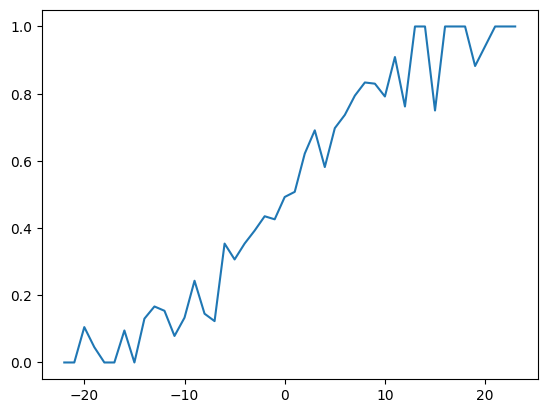

In [175]:
import matplotlib.pyplot as plt
plot_df = pd.DataFrame({"pred":oof_preds[0], "label":np.where(y>0,1,0)})
plot_df["pred_int"] = plot_df["pred"].astype(int)
plot_df = plot_df.groupby('pred_int')['label'].mean().reset_index(name='average_win_pct')

plt.figure()
plt.plot(plot_df.pred_int,plot_df.average_win_pct)

In [176]:
spline_model = []

for i in range(repeat_cv):
    dat = list(zip(oof_preds[i],np.where(y>0,1,0)))
    dat = sorted(dat, key = lambda x: x[0])
    datdict = {}
    for k in range(len(dat)):
        datdict[dat[k][0]]= dat[k][1]
        
    spline_model.append(UnivariateSpline(list(datdict.keys()), list(datdict.values())))
    spline_fit = spline_model[i](oof_preds[i])
    
    print(f"logloss of cvsplit {i}: {log_loss(np.where(y>0,1,0),spline_fit)}") 

logloss of cvsplit 0: 0.7885693854220366
logloss of cvsplit 1: 0.5764164116350339
logloss of cvsplit 2: 0.7355703270523052


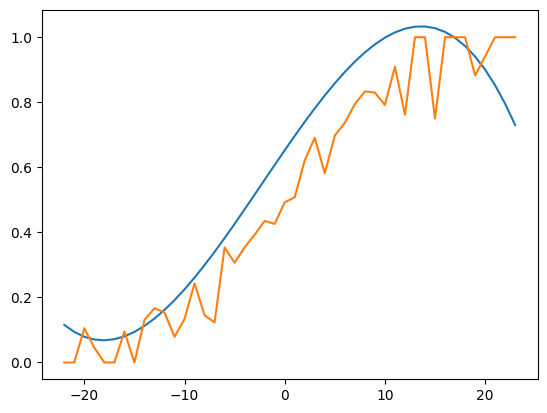

In [177]:
plot_df = pd.DataFrame({"pred":oof_preds[0], "label":np.where(y>0,1,0), "spline":spline_model[0](oof_preds[0])})
plot_df["pred_int"] = (plot_df["pred"]).astype(int)
plot_df = plot_df.groupby('pred_int')[['spline','label']].mean().reset_index()

plt.figure()
plt.plot(plot_df.pred_int,plot_df.spline)
plt.plot(plot_df.pred_int,plot_df.label)

In [178]:
spline_model = []

for i in range(repeat_cv):
    dat = list(zip(oof_preds[i],np.where(y>0,1,0)))
    dat = sorted(dat, key = lambda x: x[0])
    datdict = {}
    for k in range(len(dat)):
        datdict[dat[k][0]]= dat[k][1]
    spline_model.append(UnivariateSpline(list(datdict.keys()), list(datdict.values())))
    spline_fit = spline_model[i](oof_preds[i])
    spline_fit = np.clip(spline_fit,0.025,0.975)
    
    print(f"adjusted logloss of cvsplit {i}: {log_loss(np.where(y>0,1,0),spline_fit)}") 


spline_model = []

for i in range(repeat_cv):
    dat = list(zip(oof_preds[i],np.where(y>0,1,0)))
    dat = sorted(dat, key = lambda x: x[0])
    datdict = {}
    for k in range(len(dat)):
        datdict[dat[k][0]]= dat[k][1]
    spline_model.append(UnivariateSpline(list(datdict.keys()), list(datdict.values())))
    spline_fit = spline_model[i](oof_preds[i])
    spline_fit = np.clip(spline_fit,0.025,0.975)
    spline_fit[(X_train.away_seed==1) & (X_train.home_seed==16)] = 1.0
    spline_fit[(X_train.away_seed==2) & (X_train.home_seed==15)] = 1.0
    spline_fit[(X_train.away_seed==3) & (X_train.home_seed==14)] = 1.0
    spline_fit[(X_train.away_seed==4) & (X_train.home_seed==13)] = 1.0
    spline_fit[(X_train.away_seed==16) & (X_train.home_seed==1)] = 0.0
    spline_fit[(X_train.away_seed==15) & (X_train.home_seed==2)] = 0.0
    spline_fit[(X_train.away_seed==14) & (X_train.home_seed==3)] = 0.0
    spline_fit[(X_train.away_seed==13) & (X_train.home_seed==4)] = 0.0
    
    print(f"adjusted logloss of cvsplit {i}: {log_loss(np.where(y>0,1,0),spline_fit)}") 

spline_model = []

for i in range(repeat_cv):
    dat = list(zip(oof_preds[i],np.where(y>0,1,0)))
    dat = sorted(dat, key = lambda x: x[0])
    datdict = {}
    for k in range(len(dat)):
        datdict[dat[k][0]]= dat[k][1]
    spline_model.append(UnivariateSpline(list(datdict.keys()), list(datdict.values())))
    spline_fit = spline_model[i](oof_preds[i])
    spline_fit = np.clip(spline_fit,0.025,0.975)
    spline_fit[(train_event_df.away_seed==1) & (train_event_df.home_seed==16) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==2) & (train_event_df.home_seed==15) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==3) & (train_event_df.home_seed==14) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==4) & (train_event_df.home_seed==13) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==16) & (train_event_df.home_seed==1) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    spline_fit[(train_event_df.away_seed==15) & (train_event_df.home_seed==2) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    spline_fit[(train_event_df.away_seed==14) & (train_event_df.home_seed==3) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    spline_fit[(train_event_df.away_seed==13) & (train_event_df.home_seed==4) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    
    print(f"adjusted logloss of cvsplit {i}: {log_loss(np.where(y>0,1,0),spline_fit)}") 

adjusted logloss of cvsplit 0: 0.60559406603566
adjusted logloss of cvsplit 1: 0.5762034852711801
adjusted logloss of cvsplit 2: 0.5709696016776059
adjusted logloss of cvsplit 0: 1.4622877765311624
adjusted logloss of cvsplit 1: 1.4392771358273988
adjusted logloss of cvsplit 2: 1.4312714776808615
adjusted logloss of cvsplit 0: 0.5775710660540033
adjusted logloss of cvsplit 1: 0.5469379739386008
adjusted logloss of cvsplit 2: 0.5509211110784207


In [179]:
val_cv = []
spline_model = []

for i in range(repeat_cv):
    dat = list(zip(oof_preds[i],np.where(y>0,1,0)))
    dat = sorted(dat, key = lambda x: x[0])
    datdict = {}
    for k in range(len(dat)):
        datdict[dat[k][0]]= dat[k][1]
    spline_model.append(UnivariateSpline(list(datdict.keys()), list(datdict.values())))
    spline_fit = spline_model[i](oof_preds[i])
    spline_fit = np.clip(spline_fit,0.025,0.975)
    spline_fit[(train_event_df.away_seed==1) & (train_event_df.home_seed==16) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==2) & (train_event_df.home_seed==15) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==3) & (train_event_df.home_seed==14) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==4) & (train_event_df.home_seed==13) & (train_event_df.away_score > train_event_df.home_score)] = 1.0
    spline_fit[(train_event_df.away_seed==16) & (train_event_df.home_seed==1) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    spline_fit[(train_event_df.away_seed==15) & (train_event_df.home_seed==2) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    spline_fit[(train_event_df.away_seed==14) & (train_event_df.home_seed==3) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    spline_fit[(train_event_df.away_seed==13) & (train_event_df.home_seed==4) & (train_event_df.away_score < train_event_df.home_score)] = 0.0
    
    val_cv.append(pd.DataFrame({"y":np.where(y>0,1,0), "pred":spline_fit, "season":train_event_df.season}))
    print(f"adjusted logloss of cvsplit {i}: {log_loss(np.where(y>0,1,0),spline_fit)}") 
    
val_cv = pd.concat(val_cv)
val_cv.groupby('season').apply(lambda x: log_loss(x.y, x.pred))

adjusted logloss of cvsplit 0: 0.5775710660540033
adjusted logloss of cvsplit 1: 0.5469379739386008
adjusted logloss of cvsplit 2: 0.5509211110784207


C:\Users\charl\AppData\Local\Temp\ipykernel_30308\587613385.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_cv.groupby('season').apply(lambda x: log_loss(x.y, x.pred))


season
2003    0.539636
2004    0.548576
2005    0.524774
2006    0.595115
2007    0.448062
2008    0.501190
2009    0.470128
2010    0.567726
2011    0.633739
2012    0.568943
2013    0.654161
2014    0.590967
2015    0.524669
2016    0.571377
2017    0.518036
2018    0.654144
2019    0.494731
2021    0.635548
dtype: float64

In [180]:
dtest = xgb.DMatrix(X_test.values)

sub_models = []
for i in range(repeat_cv):
    print(f"Fold repeater {i}")
    sub_models.append(
        xgb.train(
          params = param,
          dtrain = dtrain,
          num_boost_round = int(iteration_counts[i] * 1.05),
          verbose_eval = 50
        )
    )

sub_preds = []
for i in range(repeat_cv):
    sub_preds.append(np.clip(spline_model[i](np.clip(sub_models[i].predict(dtest),-30,30)),0.025,0.975))
    
y_pred = pd.DataFrame(sub_preds).mean(axis=0)

Fold repeater 0


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold repeater 1


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold repeater 2


c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:19:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [134]:
train_event_df = train_event_df.sample(frac=1, random_state=42)
test_event_df = test_event_df.sample(frac=1, random_state=42)

X_train, y_train, metadata_train = train_event_df[ATTRIBUTE_COLS],train_event_df[TARGET_COL],train_event_df[METADATA_COLS]
X_test, y_test, metadata_test = test_event_df[ATTRIBUTE_COLS],test_event_df[TARGET_COL],test_event_df[METADATA_COLS]


## Need to look at round of 64 matchups for latest tournament we have
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer, brier_score_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Convert the search space to use skopt types
search_space = {
    'n_estimators': (50, 250),
    'max_features': (0.1, 1.0),
    'max_depth': (5, 15),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}



# Create the RandomForestClassifier
best_rf_classifier = RandomForestClassifier(random_state=42)

'''
# Define a scoring metric (e.g., brier score)
scoring_metric = make_scorer(brier_score_loss, greater_is_better=False, needs_proba=True)

# Create the GridSearchCV object
grid_search = BayesSearchCV(estimator=rf_classifier, search_spaces=search_space, scoring=scoring_metric, cv=5, n_iter=20,return_train_score=True, n_jobs=4)

# Fit the model to the training data
np.int = int
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_rf_classifier = grid_search.best_estimator_
metadata_test['pred'] = best_rf_classifier.predict_proba(X_test)[:, 1]


best_rf_classifier = RandomForestClassifier(random_state=42, bootstrap=True, criterion='entropy',max_depth=9, max_features=0.25, min_samples_leaf=4, min_samples_split=15, n_estimators=200)
'''
best_rf_classifier.fit(X_train, y_train)
metadata_test['pred'] = best_rf_classifier.predict_proba(X_test)[:, 1]
metadata_test = metadata_test.drop_duplicates('game_id')

c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\charl\AppData\Local\Temp\ipykernel_30308\2436380125.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_test['pred'] = best_rf_classifier.predict_proba(X_test)[:, 1]


In [152]:
# Define the search space for SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
search_space_svc = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),  # Regularization parameter
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'degree': Integer(1, 5),  # Only relevant for poly kernel
    'gamma': Categorical(['scale', 'auto'] + list(np.logspace(-6, 6, 13))),
}

# Create the SVC classifier with StandardScaler
svc_classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42)),
])

# Define a scoring metric (e.g., brier score)
scoring_metric = make_scorer(brier_score_loss, greater_is_better=False, needs_proba=True)

# Create the BayesSearchCV object for SVC
bayes_search_svc = BayesSearchCV(estimator=svc_classifier, search_spaces=search_space_svc, scoring=scoring_metric, cv=5, n_iter=20, n_jobs=4)

# Fit the model to the training data
np.int = int
bayes_search_svc.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svc = bayes_search_svc.best_params_
print("Best Hyperparameters for SVC:", best_params_svc)

# Use the best model for predictions
best_svc_classifier = bayes_search_svc.best_estimator_
metadata_test['pred'] = best_svc_classifier.predict_proba(X_test)[:, 1]
metadata_test = metadata_test.drop_duplicates('game_id')

c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
c:\Users\charl\Desktop\Git\tep-research\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ValueError: Invalid parameter 'C' for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(probability=True, random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [181]:
from sklearn.metrics import brier_score_loss, log_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def classification_evaluation(y_true: np.ndarray, y_pred: np.ndarray) -> dict:
    """
    Evaluate classification metrics for binary or multiclass classification.

    Parameters:
    - y_true (numpy.ndarray): True labels.
    - y_pred (numpy.ndarray): Predicted probabilities or class labels.

    Returns:
    dict: Dictionary containing classification metrics.
    """
    y_true = np.array(y_true).ravel()
    if set(y_true) == {0, 1} or len(list(set(y_true))) <= 2:
        # Binary classification
        y_true_binary = y_true.astype(bool)
        brier_score = brier_score_loss(y_true_binary.astype(int), y_pred)
        y_pred_binary = (y_pred > 0.5).astype(int)
        accuracy = accuracy_score(y_true_binary, y_pred_binary)
        precision = precision_score(y_true_binary, y_pred_binary)
        recall = recall_score(y_true_binary, y_pred_binary)
        f1 = f1_score(y_true_binary, y_pred_binary)
        if len(list(set(y_true))) < 2:
            roc_auc = None
            log_loss_score = None
        else:
            roc_auc = roc_auc_score(y_true_binary, y_pred_binary)
            log_loss_score = log_loss(y_true_binary, y_pred)
        error = y_pred.round(2) - y_true_binary
        my_score = ((25 - (100 * error)).sum() / len(y_true_binary)).round(2)
    else:
        # Multiclass classification
        y_true_multiclass = y_true
        log_loss_score = log_loss(y_true_multiclass, y_pred)
        y_pred_multiclass = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_true_multiclass, y_pred_multiclass)
        precision = precision_score(y_true_multiclass, y_pred_multiclass, average='weighted')
        recall = recall_score(y_true_multiclass, y_pred_multiclass, average='weighted')
        f1 = f1_score(y_true_multiclass, y_pred_multiclass, average='weighted')
        roc_auc = None
        brier_score = None
        my_score = None

    return {
        'system_accuracy': accuracy,
        'system_precision': precision,
        'system_recall': recall,
        'system_f1': f1,
        'system_auc': roc_auc,
        'system_brier_score': brier_score,
        'system_log_loss': log_loss_score,
        'system_score': my_score,
        'system_records': len(y_true),
    }

In [183]:
y_pred

0      0.742437
1      0.352112
2      0.940355
3      0.566555
4      0.487531
         ...   
129    0.952156
130    0.326260
131    0.567523
132    0.925069
133    0.958607
Length: 134, dtype: float64

In [184]:
np.where(y_test.values.ravel()>0,1,0)

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1])

In [182]:
#classification_evaluation(y_true=metadata_test['result'],y_pred=metadata_test['pred'])
classification_evaluation(y_true=np.where(y_test.values.ravel()>0,1,0),y_pred=y_pred)


{'system_accuracy': 0.6343283582089553,
 'system_precision': 0.6022727272727273,
 'system_recall': 0.7910447761194029,
 'system_f1': 0.6838709677419355,
 'system_auc': 0.6343283582089552,
 'system_brier_score': 0.22340378109387213,
 'system_log_loss': 0.6541443903137866,
 'system_score': 16.52,
 'system_records': 134}

In [137]:
classification_evaluation(y_true=metadata_test['result'],y_pred=metadata_test['pred'])

{'system_accuracy': 0.7014925373134329,
 'system_precision': 0.6857142857142857,
 'system_recall': 0.7272727272727273,
 'system_f1': 0.7058823529411765,
 'system_auc': 0.7018716577540107,
 'system_brier_score': 0.2036955223880597,
 'system_log_loss': 0.5901002992811787,
 'system_score': 23.81,
 'system_records': 67}

In [138]:
classification_evaluation(y_true=metadata_test['result'],y_pred=metadata_test['home_elo_prob'])

{'system_accuracy': 0.6417910447761194,
 'system_precision': 0.6451612903225806,
 'system_recall': 0.6060606060606061,
 'system_f1': 0.625,
 'system_auc': 0.6412655971479501,
 'system_brier_score': 0.22085887318820502,
 'system_log_loss': 0.6295394755344431,
 'system_score': 24.87,
 'system_records': 67}

In [139]:
features = []
for i, v in enumerate(best_rf_classifier.feature_importances_):
    features.append({'col': X_test.columns[i], 'score': v})
    # print(f'Feature: {X_test.columns[i]}, Score: {v}')
pd.DataFrame(features).sort_values('score').col.values


array(['home_post_win_perc', 'away_post_non_conf_win_perc',
       'away_post_win_perc', 'home_def_true_shooting_percentage',
       'home_off_arc_percentage', 'home_conf_win_perc',
       'home_off_assists', 'home_post_non_conf_win_perc',
       'home_def_rating', 'home_conf_avg_margin',
       'away_post_off_field_goal_percentage',
       'home_def_field_goal_percentage', 'home_off_free_throw_percentage',
       'home_def_rebound_percentage', 'away_post_non_conf_avg_margin',
       'home_off_turnover_percentage', 'home_def_assists',
       'home_post_non_conf_avg_margin', 'home_off_field_goal_percentage',
       'away_off_productivity_score', 'away_conf_win_perc',
       'away_post_avg_margin', 'home_post_avg_margin',
       'away_conf_avg_margin', 'home_off_true_shooting_percentage',
       'home_non_conf_win_perc', 'away_off_field_goal_percentage',
       'away_pace', 'away_off_turnover_percentage',
       'away_def_arc_percentage', 'home_off_steals', 'away_win_perc',
       'away_